# Bayesian Network 

Bayesian Network is a probabilistic graphical model for representing knowledge about an uncertain domain that helps make predictions under uncertainty. It consists of nodes and edges where each node corresponds to a random variable and each edge represents conditional probability for the for the corresponding random variables. Bayesian Networks are also called belief networks or Bayes nets.



The Cleveland heart disease data retrieved from  UCI (University of California, Irvine) repository is chosen as an example for the implementation of Bayesian Network. The dataset consists of 303 individuals’ data. The Cleveland database originally consists of 75 attributes, but out of 75 only 14 attributes have been extracted. This is an example of classification task to predict whether an individual is suffering from heart disease or not (0: absence, 1: presence). The "heartdisease" field refers to the presence or absence of heart disease in the patient. 


This database contains 13 attributes and a target variable, i.e. heartdisease. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term is categorized into 4 categories.
0 refers to typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting, > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values.
0 : Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV), 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise. 0 depicting NO, 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise.
0: up sloping, 1: flat, 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(Nominal)
13. thal: A blood disorder called thalassemia.
0: NULL, 1: normal blood flow, 2: fixed defect (no blood flow in some part of the heart), 3: reversible defect (a blood flow is observed but it is not normal(Nominal)
14. heartdisease: It is the target variable which we have to predict. 1 means patient is suffering from heart disease and 0 means patient is healthy.

The heart disease example is implemented on Python language using Jupyter Notebook which is an efficient IDE (Integrated development Environment) for easily combining text(selecting Markdown option from dropdown list) and code(Python in this case) in one canvas called notebook. We import some of the python libraries before working on the data. 

NumPy and pandas are very useful libraries in python. NumPy is an open-source Python library that facilitates efficient numerical operations on large quantities of data. A pandas DataFrame can be easily changed and manipulated. Pandas has helpful functions for handling missing data, performing operations on columns and rows, and transforming data. 
The Bayesian Network-specific library is "pgmpy" which is a pure python implementation for Bayesian Networks with various algorithms for Structure Learning, Parameter Estimation, Approximate (Sampling Based) and Exact inference, and Causal Inference are available. For visualization purposes, "networkx" and "matplotlib" libraries are imported.

I used Anaconda which is a free python/R data science distribution. If Anaconda is installed, NumPy and pandas may have been auto-installed as well. If they haven’t been, or if we want to update to the latest versions, we can open a terminal window and run the following commands:
<code>
conda install numpy
conda install pandas 
</code>
Once these libraries are installed, you’re ready to open any Python coding environment (Jupyter Notebook in our example). Before you can use these libraries, you’ll need to import them using the following lines of code.

In [27]:
import numpy as np
import csv
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

As mentioned earlier,the heart disease dataset taken from UCI repository is now imported using csv library.

In [25]:
# Load the dataset
heartDisease = pd.read_csv('heart.csv')

In [28]:
# Define the structure of the Directed Acyclic Graph(DAG) by defining the edges based on some domain knowledge or assumptions
# Here, we'll assume some dependencies for demonstration purposes:
edges = [('age','trestbps'),('age','fbs'),
('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),
('heartdisease','thalach'),('heartdisease','chol')]

In [29]:
# Create the Bayesian Network
model = BayesianNetwork(edges)

In [30]:
print('Few examples from the dataset are given below')
print(heartDisease.head())

Few examples from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  heartdisease  
0   0     2             0  
1   3     1             1  
2   2     3             1  
3   0     1             0  
4   0     1             0  


In [31]:
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)


 Learning CPD using Maximum likelihood estimators


In [32]:
print('\n Inferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)


 Inferencing with Bayesian Network:


In [33]:
print('\n 1. Probability of HeartDisease given Age=50')
q=HeartDisease_infer.query(variables=['heartdisease'],evidence={'age':50})
print(q)


 1. Probability of HeartDisease given Age=50
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.4595 |
+-----------------+---------------------+
| heartdisease(1) |              0.5405 |
+-----------------+---------------------+


In [34]:
print('\n 2. Probability of HeartDisease given cholesterol=200')
q=HeartDisease_infer.query(variables=['heartdisease'],evidence={'chol':200})
print(q)


 2. Probability of HeartDisease given cholesterol=200
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+


In [35]:
# Describe basic statistical details
heartDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [37]:
# Convert the BayesianNetwork to a NetworkX graph
G = nx.DiGraph(model.edges())

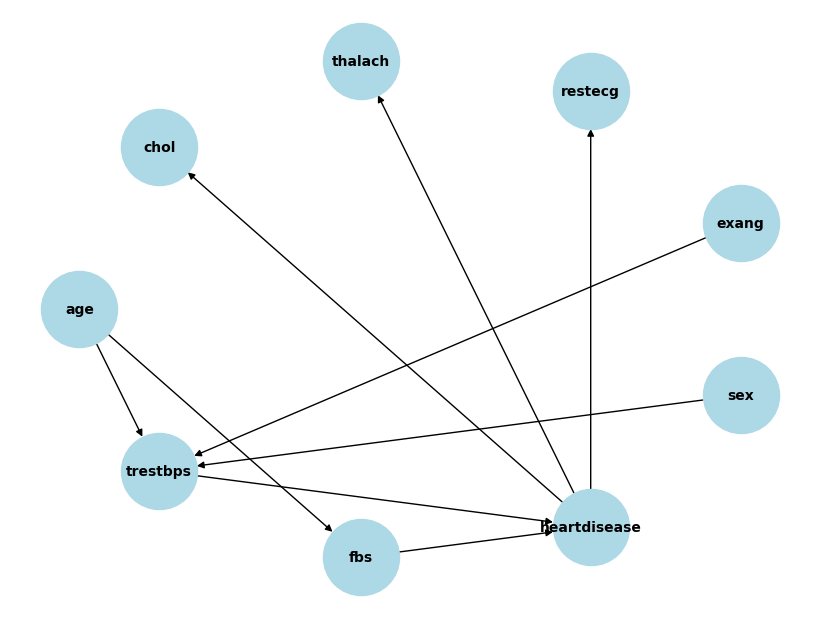

In [38]:
# Define a function to visualize the graph using a specified layout
plt.figure(figsize=(8, 6))
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

The above graph shows the structure of a Bayesian Network, illustrating the dependencies between different variables in the heart disease dataset. The nodes represent the variables, and the directed edges (arrows) represent the conditional dependencies between these variables.